# Heart Disease UCI3

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

Information About Data

In [2]:
dataset = pandas.read_csv('F:/Medium/Heart Disease/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(dataset.tail())

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
dataset.isnull().sum().sum()

0

In [7]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Correlation

In [8]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']
sns.set_style('darkgrid')

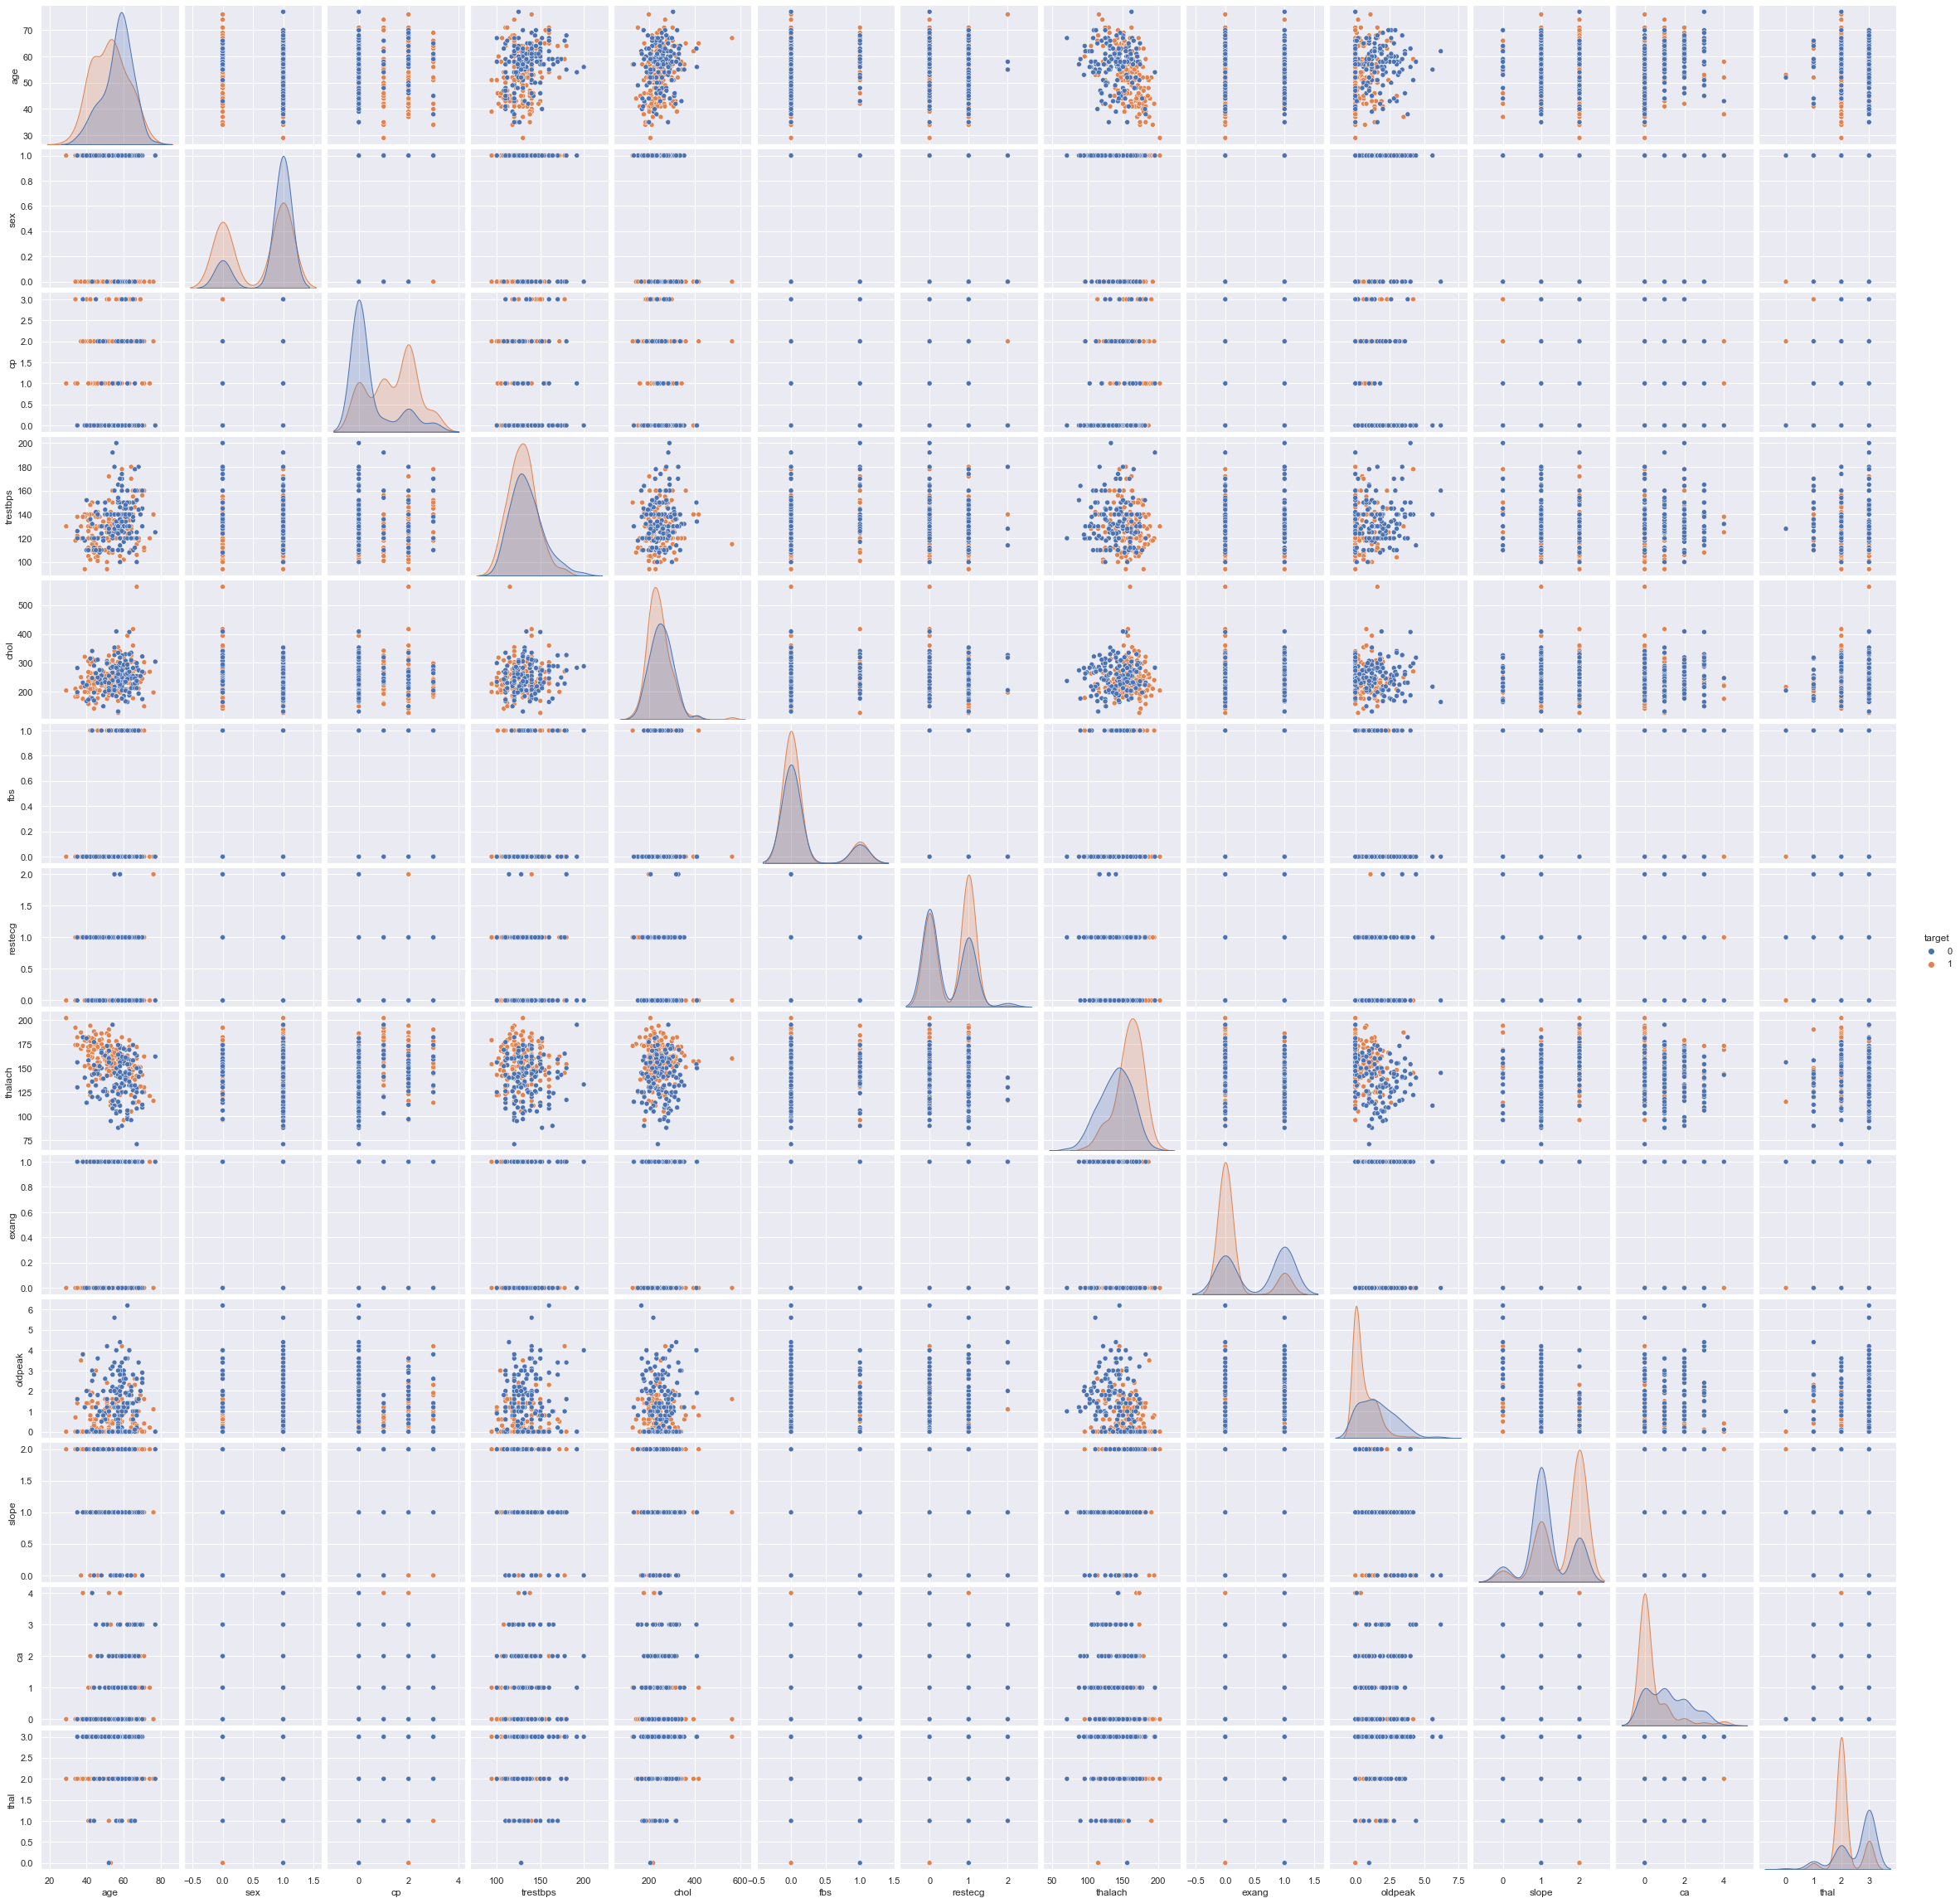

In [9]:
sns.pairplot(dataset, hue = 'target')

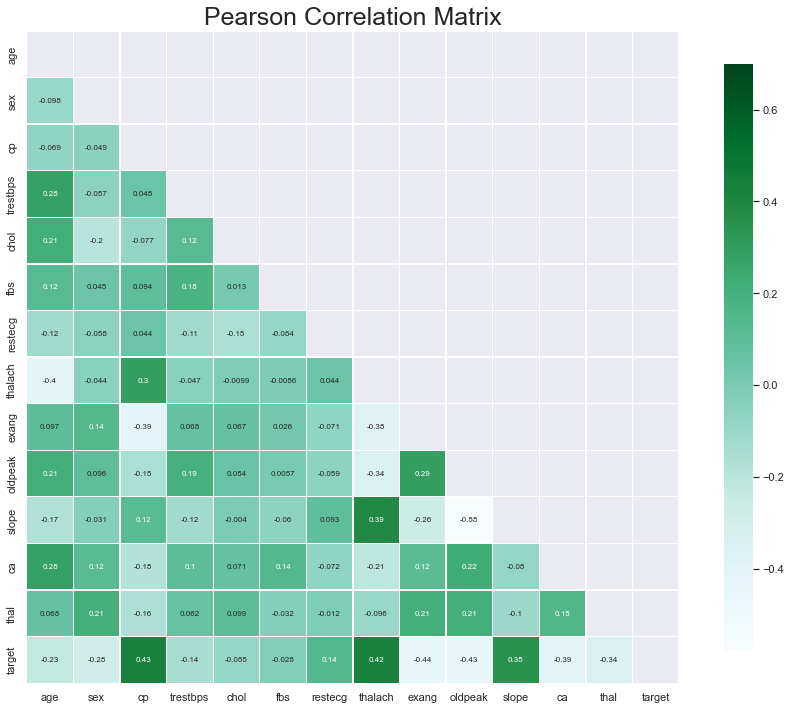

In [10]:
mask = np.zeros_like(dataset[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.set_style('darkgrid')
sns.heatmap(dataset[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

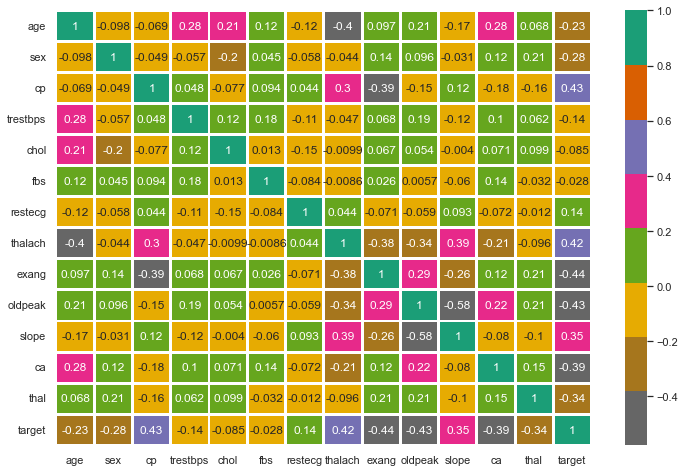

In [11]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

Data Visualization

<AxesSubplot:xlabel='target', ylabel='age'>

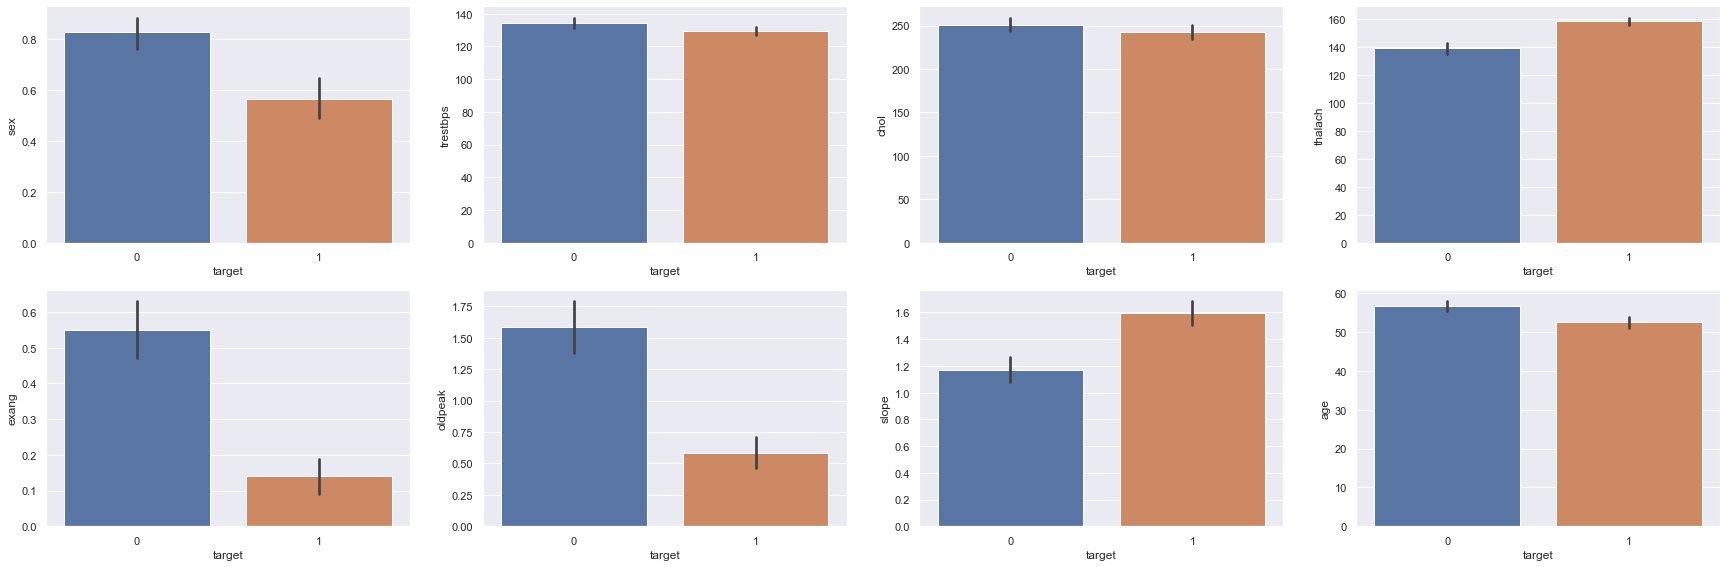

In [12]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'target', y = 'sex', data = dataset)

plt.subplot(4,4,2)
sns.barplot(x = 'target', y = 'trestbps', data = dataset)

plt.subplot(4,4,3)
sns.barplot(x = 'target', y = 'chol', data = dataset)

plt.subplot(4,4,4)
sns.barplot(x = 'target', y = 'thalach', data = dataset)

plt.subplot(4,4,5)
sns.barplot(x = 'target', y = 'exang', data = dataset)

plt.subplot(4,4,6)
sns.barplot(x = 'target', y = 'oldpeak', data = dataset)

plt.subplot(4,4,7)
sns.barplot(x = 'target', y = 'slope', data = dataset)

plt.subplot(4,4,8)
sns.barplot(x = 'target', y = 'age', data = dataset)

<AxesSubplot:xlabel='target', ylabel='thal'>

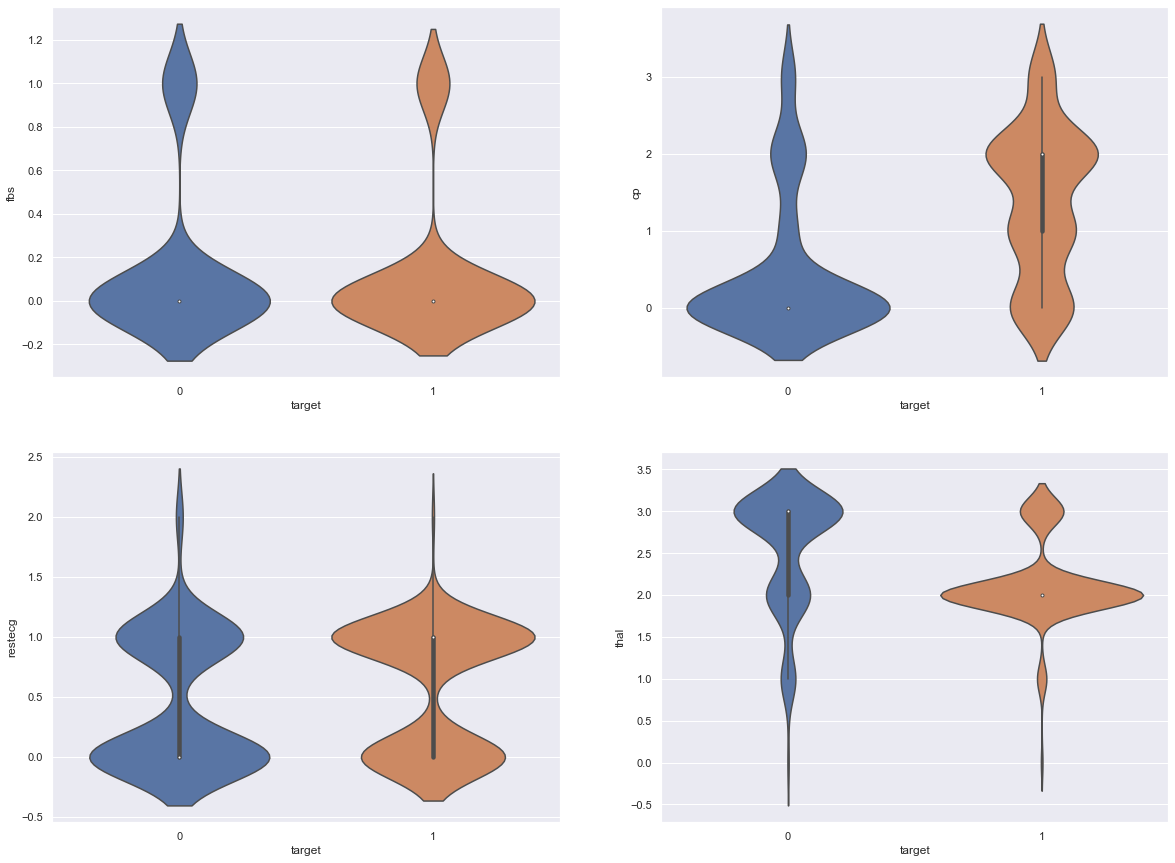

In [13]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.violinplot(x = 'target', y = 'fbs', data = dataset)
plt.subplot(2,2,2)
sns.violinplot(x = 'target', y = 'cp', data = dataset)
plt.subplot(2,2,3)
sns.violinplot(x = 'target', y = 'restecg', data = dataset)
plt.subplot(2,2,4)
sns.violinplot(x = 'target', y = 'thal', data = dataset)

Text(0.5, 1.0, 'Oldpeak Interval')

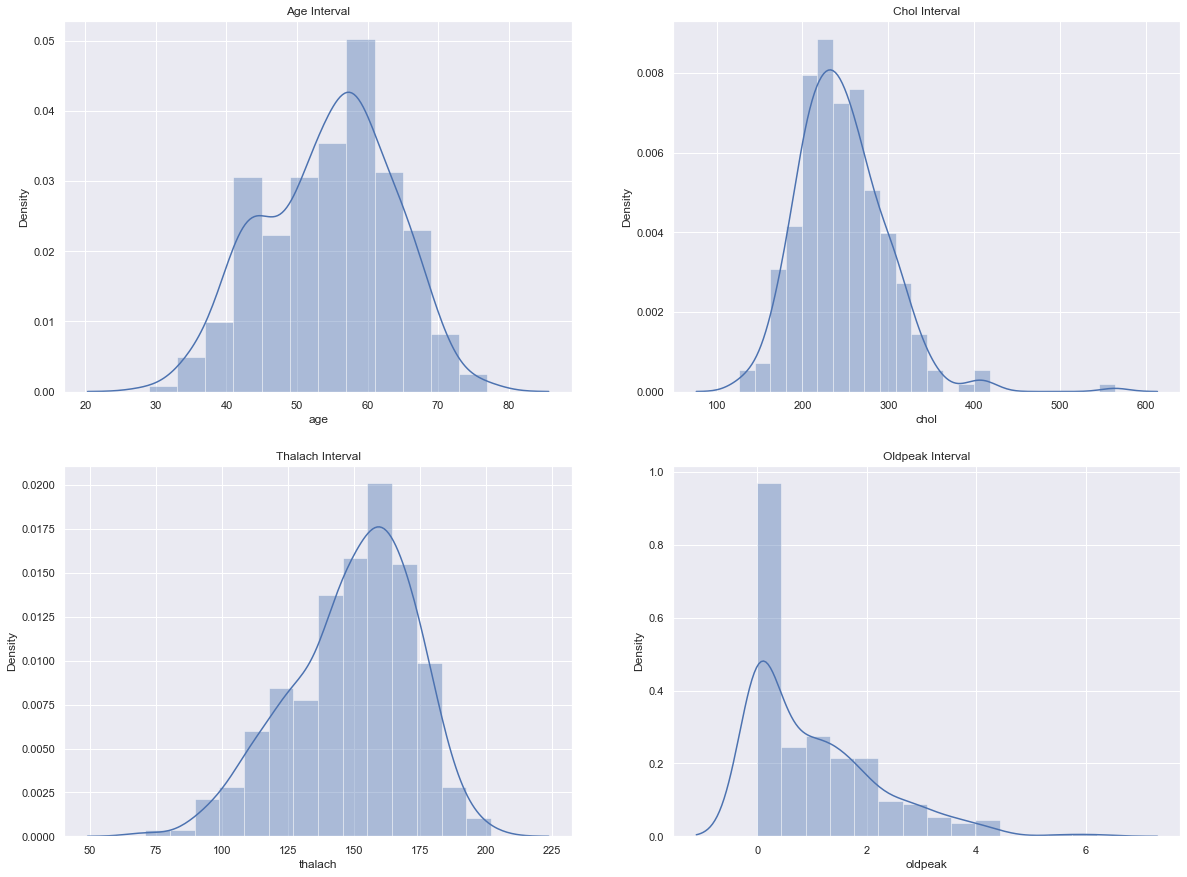

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.distplot(dataset['age']).set_title('Age Interval')

plt.subplot(2,2,2)
sns.distplot(dataset['chol']).set_title('Chol Interval')

plt.subplot(2,2,3)
sns.distplot(dataset['thalach']).set_title('Thalach Interval')

plt.subplot(2,2,4)
sns.distplot(dataset['oldpeak']).set_title('Oldpeak Interval')

Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too

In [15]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Data Preprocessing

In [16]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
label = ['target']

X = dataset[features]
y = dataset[label]

In [17]:
X = normalize(X, norm = 'l2')
print(X[:3])

[[0.19745405 0.00313419 0.00940257 0.45445773 0.73026656 0.00313419
  0.         0.47012869 0.         0.00720864 0.         0.
  0.00313419]
 [0.10874818 0.00293914 0.00587828 0.3820882  0.734785   0.
  0.00293914 0.54961918 0.         0.01028699 0.         0.
  0.00587828]
 [0.1368249  0.         0.00333719 0.43383504 0.68078729 0.
  0.         0.57399713 0.         0.00467207 0.00667439 0.
  0.00667439]]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 303
Total # of sample in train dataset: 203
Total # of sample in validation dataset: 50
Total # of sample in test dataset: 50


Scores of Models

GaussianNB
Train score of trained model: 84.23645320197043
Validation score of trained model: 80.0
Test score of trained model: 86.0
 
Confussion Matrix: 
[[22  3]
 [ 4 21]]

Accuracy : 0.86
Precision: 0.875
Recall   : 0.84
F1 score : 0.8571428571428572
Specificity : 0.88

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.88      0.84      0.86        25

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



############################################################################



MultinomialNB
Train score of trained model: 55.66502463054187
Validation score of trained model: 56.00000000000001
Test score of trained model: 48.0
 
Confussion Matrix: 
[[ 0  0]
 [26 24]]

Accuracy : 0.48
Precision: 1.0
Recall   : 0.48
F1 score : 0.6486486486486487
Specificity : nan

Classi

############################################################################





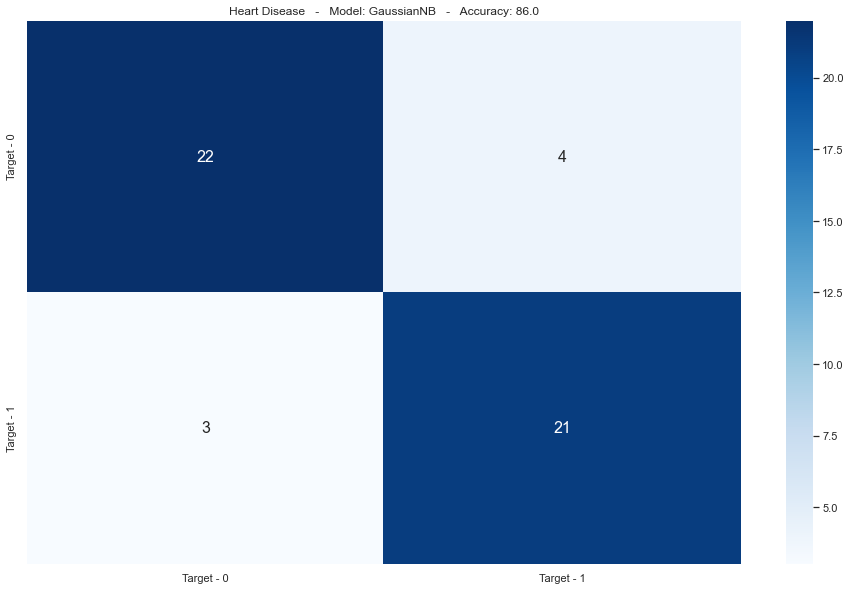

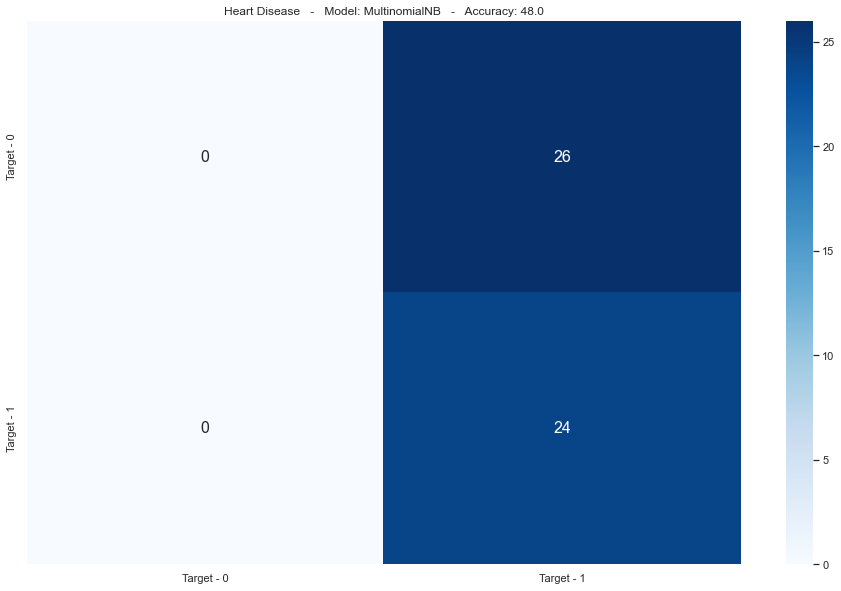

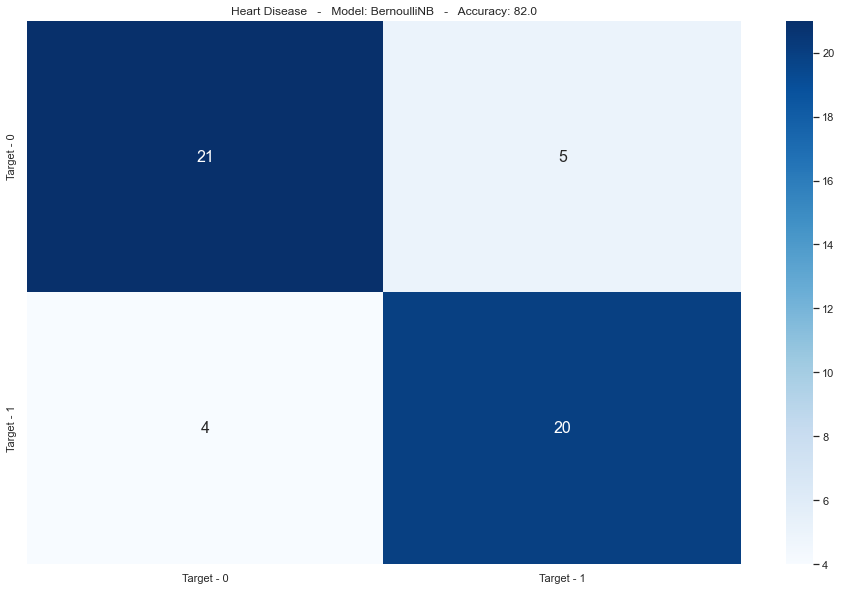

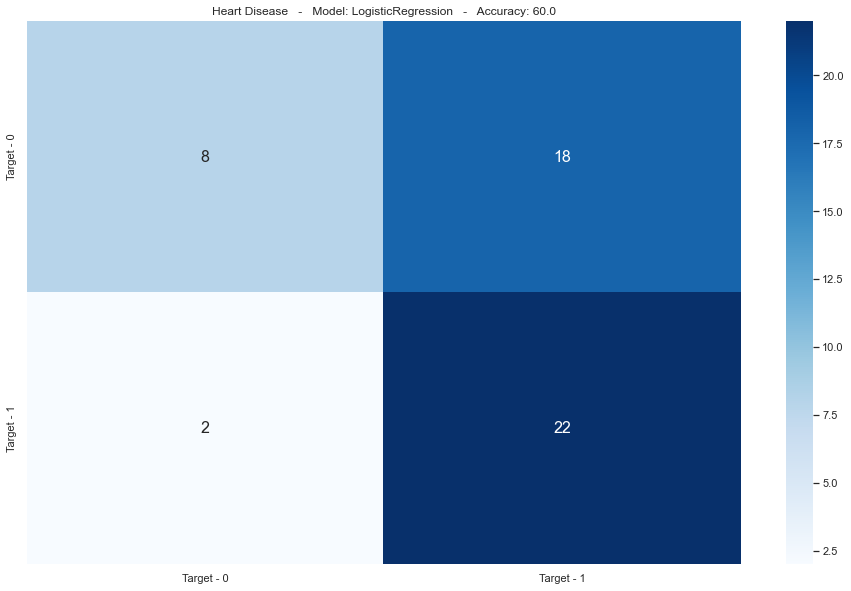

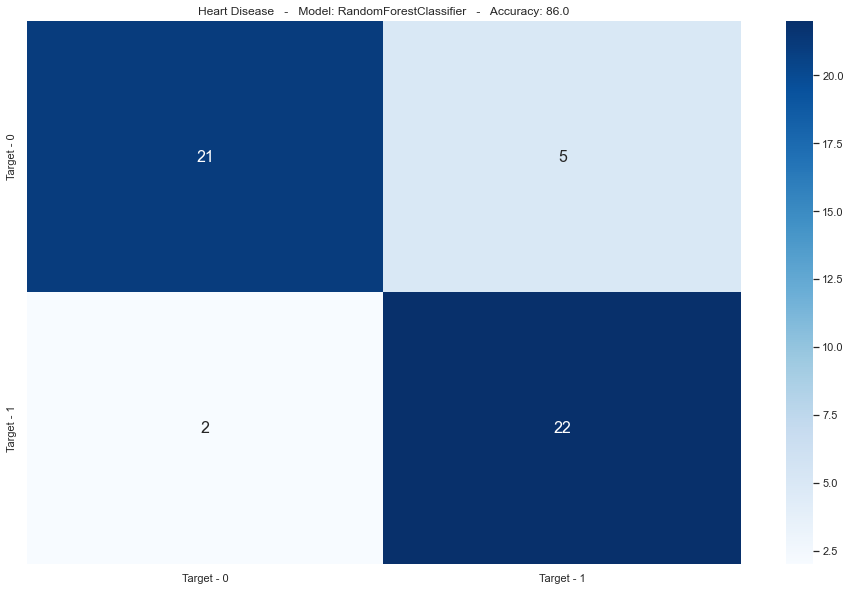

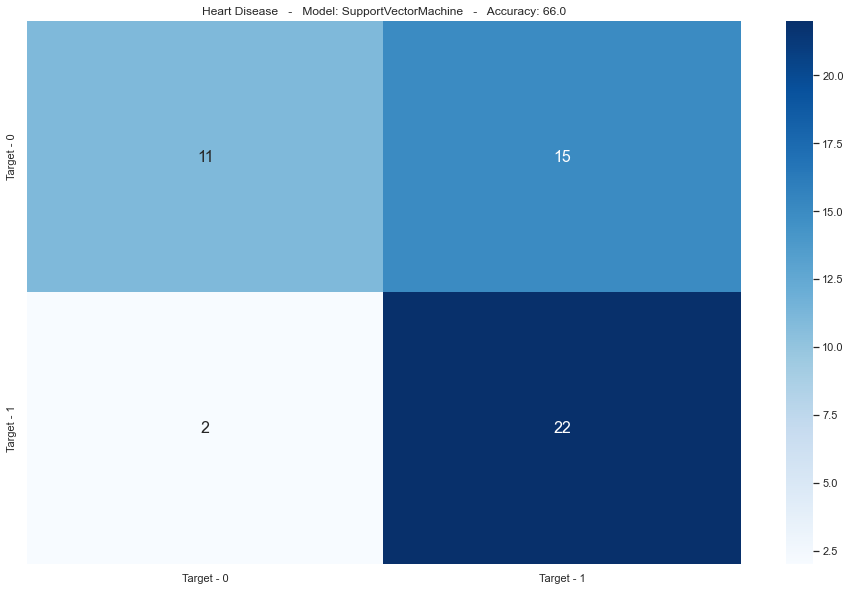

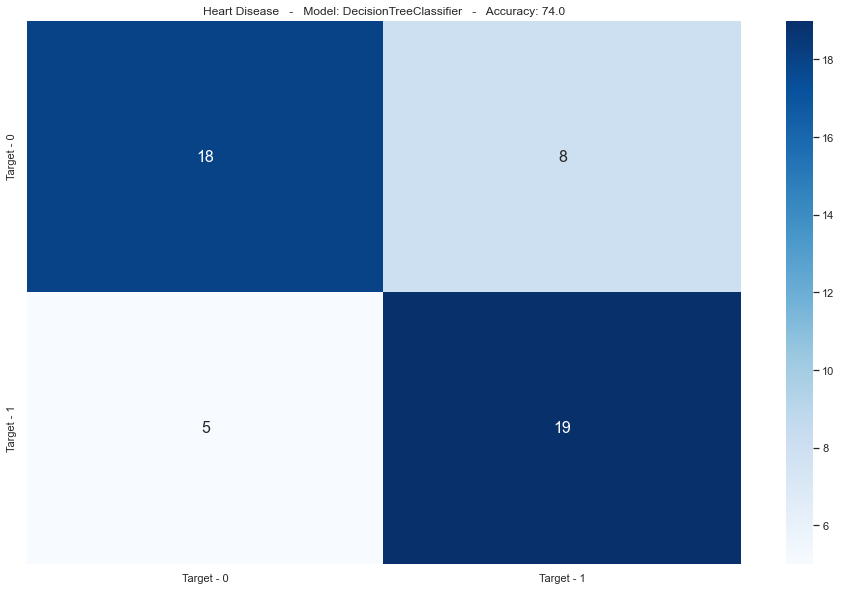

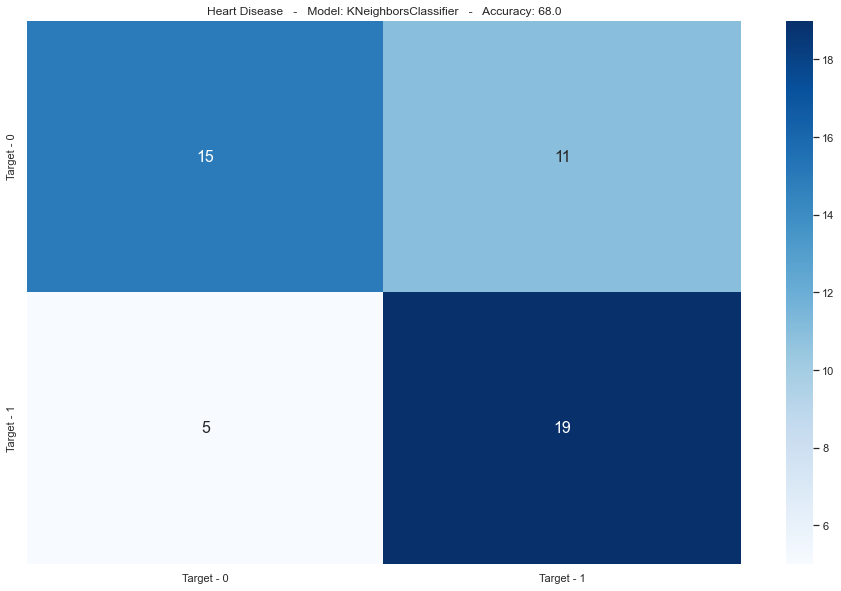

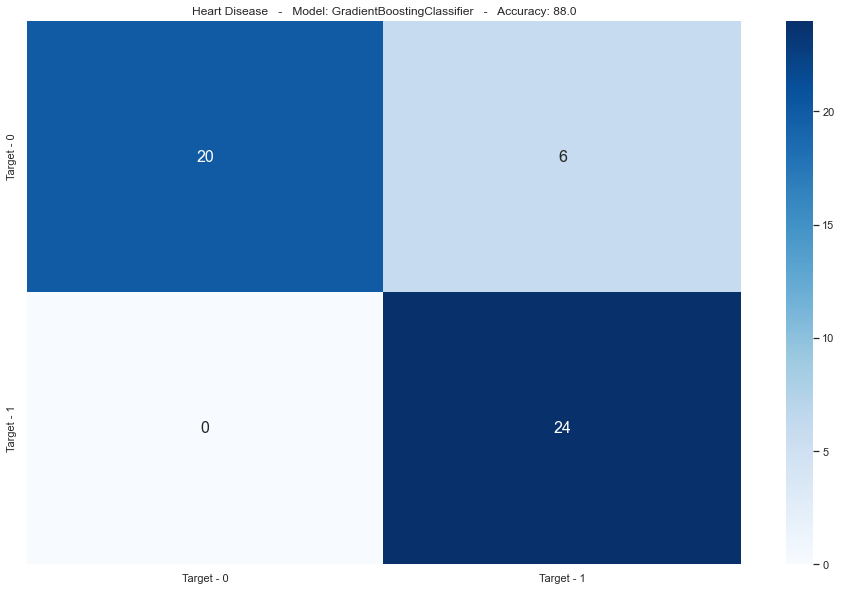

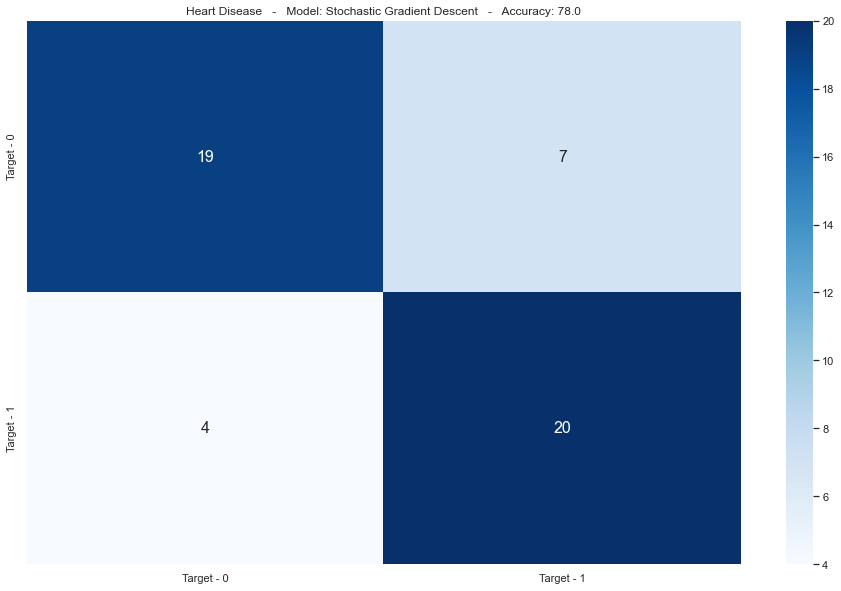

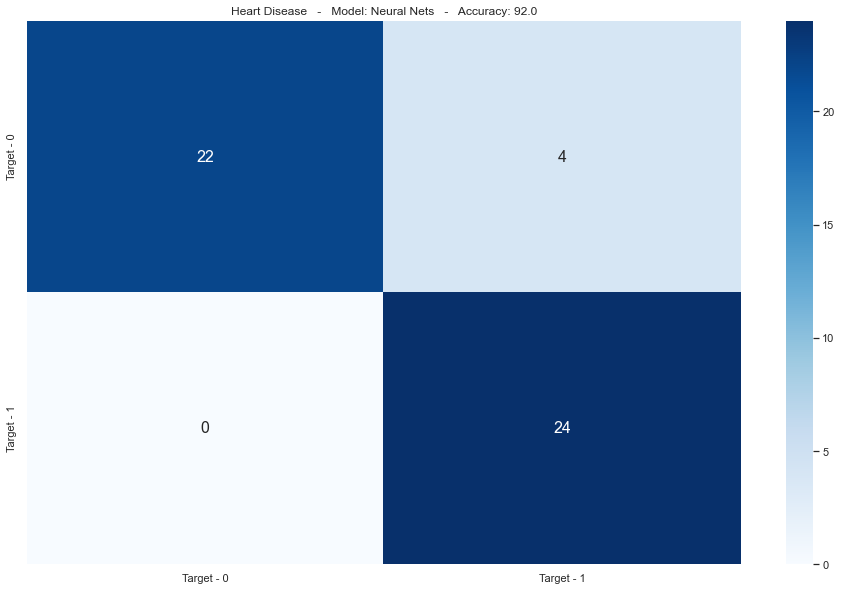

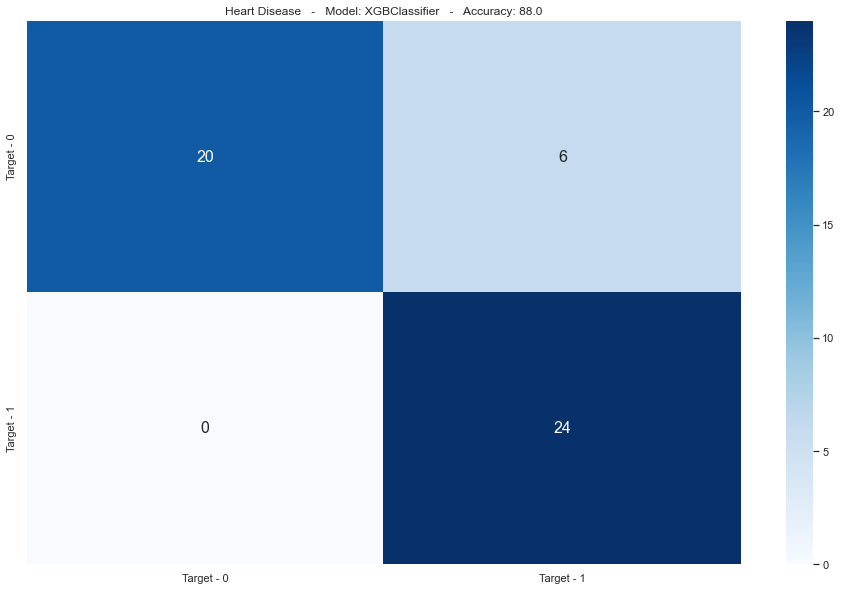

In [19]:
models = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
    'XGBClassifier': XGBClassifier()
}

modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']

trainScores = []
validationScores = []
testScores = []

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  score = model.score(X_valid, y_valid)
  #print(f'{m} validation score => {score*100}')
    
  print(f'{m}') 
  train_score = model.score(X_train, y_train)
  print(f'Train score of trained model: {train_score*100}')
  trainScores.append(train_score*100)

  validation_score = model.score(X_valid, y_valid)
  print(f'Validation score of trained model: {validation_score*100}')
  validationScores.append(validation_score*100)

  test_score = model.score(X_test, y_test)
  print(f'Test score of trained model: {test_score*100}')
  testScores.append(test_score*100)
  print(" ")
    
  y_predictions = model.predict(X_test)
  conf_matrix = confusion_matrix(y_predictions, y_test)

  print(f'Confussion Matrix: \n{conf_matrix}\n')

  predictions = model.predict(X_test)
  cm = confusion_matrix(predictions, y_test)

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  tp = conf_matrix[1,1]
  fn = conf_matrix[1,0]
  accuracy  = (tp + tn) / (tp + fp + tn + fn)
  precision = tp / (tp + fp)
  recall    = tp / (tp + fn)
  f1score  = 2 * precision * recall / (precision + recall)
  specificity = tn / (tn + fp)
  print(f'Accuracy : {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall   : {recall}')
  print(f'F1 score : {f1score}')
  print(f'Specificity : {specificity}')
  print("") 
  print(f'Classification Report: \n{classification_report(predictions, y_test)}\n')
  print("")
   
  for m in range (1):
    current = modelNames[m]
    modelNames.remove(modelNames[m])

  preds = model.predict(X_test)
  confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
  plt.figure(figsize = (16,10))
  plt.title(f'Heart Disease   -   Model: {current}   -   Accuracy: {test_score*100}')
  sns.heatmap(confusion_matr, cmap="Blues", annot=True, annot_kws={"size": 16},
              xticklabels = ['Target - 0', 'Target - 1'],
             yticklabels=['Target - 0', 'Target - 1']);
  #plt.savefig(f'{current}.jpg')
  print("############################################################################")
  print("")
  print("")
  print("")

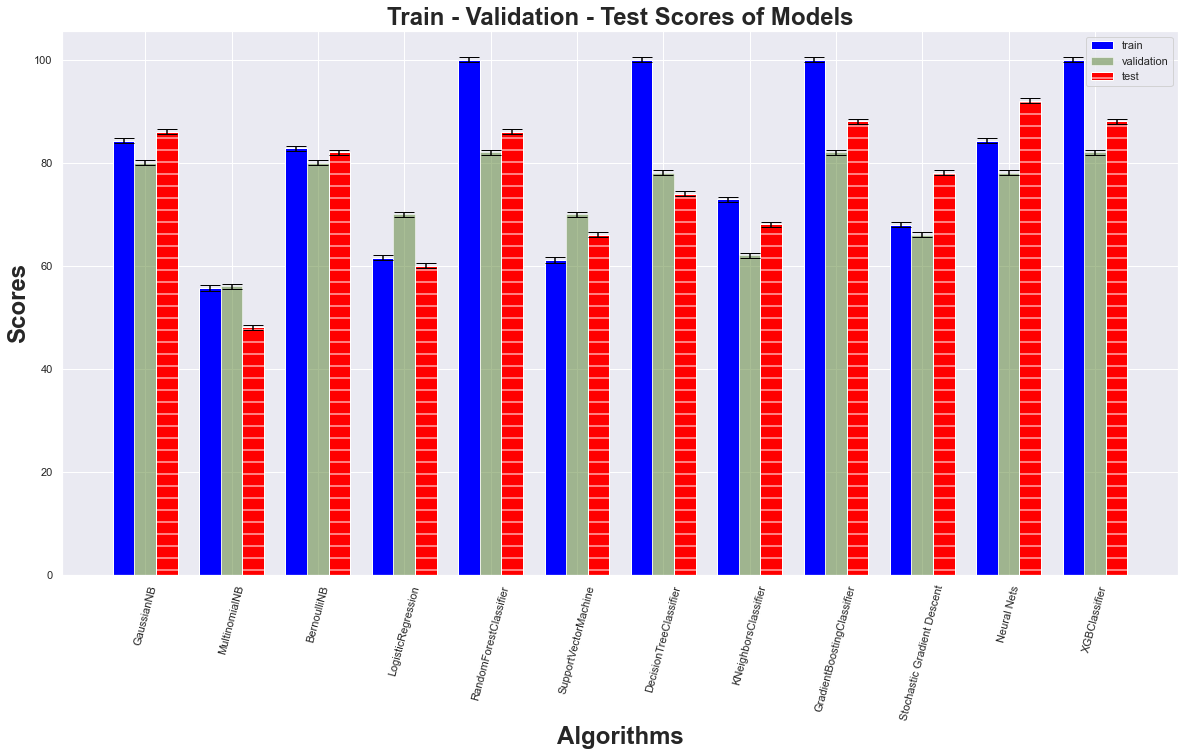

In [20]:
plt.figure(figsize=(20,10))
plt.title('Train - Validation - Test Scores of Models', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = trainScores
bars2 = validationScores
bars3 = testScores
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='train', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='validation', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='test', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = ["GaussianNB","MultinomialNB",'BernoulliNB','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier',
             'Stochastic Gradient Descent', 'Neural Nets', 'XGBClassifier']
    
plt.xlabel('Algorithms', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 75)
 
plt.legend()
plt.show()

In [21]:
for i in range(12):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')

Accuracy of GaussianNB -----> 86.0
Accuracy of MultinomialNB -----> 48.0
Accuracy of BernoulliNB -----> 82.0
Accuracy of LogisticRegression -----> 60.0
Accuracy of RandomForestClassifier -----> 86.0
Accuracy of SupportVectorMachine -----> 66.0
Accuracy of DecisionTreeClassifier -----> 74.0
Accuracy of KNeighborsClassifier -----> 68.0
Accuracy of GradientBoostingClassifier -----> 88.0
Accuracy of Stochastic Gradient Descent -----> 78.0
Accuracy of Neural Nets -----> 92.0
Accuracy of XGBClassifier -----> 88.0


The best algorithm for this dataset is MLPClassifier with 92%.

Best Features Selection

In [22]:
models = {
    'MultinomialNB': MultinomialNB(),
    'BernoulliNB': BernoulliNB(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'XGBClassifier': XGBClassifier()
}

for m in models:
  model = models[m]
  model.fit(X_train, y_train)
  
  print(f'{m}') 
  best_features = SelectFromModel(model)
  best_features.fit(X, y)

  transformedX = best_features.transform(X)
  print(f"Old Shape: {X.shape} New shape: {transformedX.shape}")
  print("\n")

MultinomialNB
Old Shape: (303, 13) New shape: (303, 9)


BernoulliNB
Old Shape: (303, 13) New shape: (303, 4)


LogisticRegression
Old Shape: (303, 13) New shape: (303, 4)


RandomForestClassifier
Old Shape: (303, 13) New shape: (303, 5)


DecisionTreeClassifier
Old Shape: (303, 13) New shape: (303, 5)


GradientBoostingClassifier
Old Shape: (303, 13) New shape: (303, 5)


Stochastic Gradient Descent
Old Shape: (303, 13) New shape: (303, 6)


[22:35:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
[22:35:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 